# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Karena Sintiya
- **Email:** M006D4KX2287@bangkit.academy
- **ID Dicoding:** karena_sintiya15

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa peminjaman sepeda pada tahun 2011 ?
2. Berapa banyak total jumlah peminjaman sepeda pada tahun 2011?
3. Berapa hari yang telah berlalu sejak pelanggan terakhir melakukan peminjaman sepeda pada tahun 2011?
4. Bagaimana korelasi antara kondisi cuaca dan jumlah peminjaman sepeda yang paling tinggi

## Import Semua Packages/Library yang Digunakan

Disini saya mengimport library yang akan saya gunakan untuk menganalisis dan membuat visualisasi dataset.


*   numpy : saya gunakan untuk merepresentasikan array multidimensional
*   pandas : saya gunakan agar dapat mengubah struktur data menjadi dataframe
*   matplotlib : saya gunakan visualisasi data
*   seaborn : saya gunakan untuk visualisasi data





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap gathering data, saya mengumpulkan data dari berbagai sumber. Disini saya mendapatkan dataset yang telah disedikan oleh Tim Dicoding yang bernama Bike Sharing Dataset. Didalamnya terdapat 2 dokumen csv yakni day.csv dan hour.csv. Setelah itu saya menggunakan library pandas untuk membaca file csv tersebut dengan menggunakan sintaks pd.read_csv(). Kemudian saya menampilkan 5 data terawal dengan sintaks head()

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap assesing data, saya mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Saya melakukan pengecekan dengan menggunakan method info() untuk mengetahui daftar nama kolom, mengetahui jumlah nilai non-null dalam setiap kolom agar saya mengetahui apakah ada missing value, dan juga untuk mengetahui tipe data dari setiap kolom. Jika dilihat dari hasil diatas, didapatkan bahwa tidak ada null pada setiap kolom. Namun terdapat tipe data yang tidak tepat yakni dteday yang seharusnya bertipe data datetime namun pada dataset itu tipe datanya masih object.

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Saya juga menggunakan method isna().sum() untuk menghitung jumlah nilai-nilai yang hilang atau missing value pada setiap kolom. Jika dilihat dari hasil di atas, didapatkan bahwa tidak ada missing value di setiap kolom sehingga sum dari missing value = 0

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Saya menggunakan method duplicated().sum() untuk menghitung jumlah baris yang memiliki nilai yang sama seperti baris sebelumnya (duplikat). Jika dilihat dari hasil di atas, didapatkan bahwa tidak ada duplikasi artinya tidak ada nilai yang sama dengan nilai sebelumnya.



In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Saya menggunakan method describe() untuk menampilkan ringkasan statistik deskriptif dari DataFrame, termasuk statistik ringkasan seperti mean, median, count, standar deviasi, nilai minimum, nilai maksimum, dan kuartil. Dengan ini saya menganalisis apakah hasil dari ringkasan statistik itu sesuai dengan dataset atau ada nilai yang inaccurate. Setelah menganalisis, saya mendapatkan bahwa hasil diatas sudah sesuai dan benar.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Selanjutnya saya melakukan hal yang sama untuk mengalisis dataset hour.csv.
Saya melakukan pengecekan dengan menggunakan method info() untuk mengetahui daftar nama kolom, mengetahui jumlah nilai non-null dalam setiap kolom agar saya mengetahui apakah ada missing value, dan juga untuk mengetahui tipe data dari setiap kolom. Jika dilihat dari hasil diatas, didapatkan bahwa tidak ada null pada setiap kolom. Namun terdapat tipe data yang tidak tepat yakni dteday yang seharusnya bertipe data datetime namun pada dataset itu tipe datanya masih object.

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Saya menggunakan method isna().sum() untuk menghitung jumlah nilai-nilai yang hilang atau missing value pada setiap kolom. Jika dilihat dari hasil di atas, didapatkan bahwa tidak ada missing value di setiap kolom sehingga sum dari missing value = 0

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Saya menggunakan method duplicated().sum() untuk menghitung jumlah baris yang memiliki nilai yang sama seperti baris sebelumnya (duplikat). Jika dilihat dari hasil di atas, didapatkan bahwa tidak ada duplikasi artinya tidak ada nilai yang sama dengan nilai sebelumnya.

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Saya menggunakan method describe() untuk menampilkan ringkasan statistik deskriptif dari DataFrame, termasuk statistik ringkasan seperti mean, median, count, standar deviasi, nilai minimum, nilai maksimum, dan kuartil. Dengan ini saya menganalisis apakah hasil dari ringkasan statistik itu sesuai dengan dataset atau ada nilai yang inaccurate. Setelah menganalisis, saya mendapatkan bahwa hasil diatas sudah sesuai dan benar.

### Cleaning Data

Setelah mengidentifikasi masalah yang ada pada tahap assesing, maka pada tahap cleaning ini saya akan mengatasi masalah itu dengan melaukan pembersihan data.

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

 Disini saya mengonversi kolom "dteday" dalam DataFrame day_df menjadi tipe data datetime.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Setelah dikonversi, maka untuk memastikan saya menggunakan method info() untuk mengecek apakah data type dari dteday sudah berubah menajdi datetime. Dari hasil di atas, didapatkan bahwa data type dari dteday sudah menjadi datetime

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

 Disini saya mengonversi kolom "dteday" dalam DataFrame hour_df menjadi tipe data datetime.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah dikonversi, maka untuk memastikan saya menggunakan method info() untuk mengecek apakah data type dari dteday sudah berubah menajdi datetime. Dari hasil di atas, didapatkan bahwa data type dari dteday sudah menjadi datetime

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis saya gunakan untuk menjawba pertanyaan bisnis yang say buat

### Explore ...

In [ ]:
day_df.describe(include="all")

<ipython-input-17-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


day_df.describe(include="all") saya gunakan untuk menyajikan ringkasan statistik deskriptif yang lebih lengkap dari DataFrame, termasuk statistik deskriptif untuk kolom-kolom numerik dan non-numerik.

In [ ]:
day_df.groupby(by="season").agg({
    "casual": ["max","min"],
    "registered": ["max","min"],
    "cnt" : ["max","min"]
})

casual      registered        cnt      
          max  min        max  min   max   min
season                                        
1        3155    9       5315  416  7836   431
2        3410  120       6456  674  8362   795
3        3160  118       6917  889  8714  1115
4        3031    2       6946   20  8555    22

Saya melakukan groupby by season untuk mengetahui jumlah peminjam casual dan registered serta totalnya (cnt) pada setiap season. Untuk jumlah peminjam casual terbanyak terjadi pada season 2 yakni Spring. Untuk jumlah peminjam registered terbanyak terjadi pada season 4 yakni fall. Untuk jumlah dari total peminjam terbanyak terjadi pada season 3 yakni summer.

In [ ]:
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
1    2049576
0    1243103
Name: cnt, dtype: int64

Saya melakukan groupby by year untuk mengetahui jumlah dari total pemijam sepeda (total dari peminjam casual ditambah registered). Tahun dengan total peminjam sepeda terbanyak ialah 1 yakni 2012 dibandingkan dengan tahun 2011(0) dengan selisih 806.473

In [ ]:
day_df.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

saya melakukan groupby by month untuk mengetahui jumlah dari total pemijam sepeda (total dari peminjam casual ditambah registered) di setiap bulan. Bulan dengan total peminjam terbanyak adalah bulan 8 atau Agustus.

In [99]:
day_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
1    2292410
0    1000269
Name: cnt, dtype: int64

saya melakukan groupby by workingday untuk mengetahui jumlah dari total pemijam sepeda (total dari peminjam casual ditambah registered) di setiap workingday. Dari hasil didapatkan jumlah total peminjam terbanyak terdapat pada hari kerja yang bukan akhir pekan atau hari libur

In [101]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

saya melakukan groupby by weathersit untuk mengetahui jumlah dari total pemijam sepeda (total dari peminjam casual ditambah registered) di setiap cuaca. Cuaca dengan total peminjam sepeda terbanyak adalah 1 yakni Clear (cuaca terang) dan jumlah dengan total peminjam sepeda tersedikit adalah 3 yakni Light snow/ light rain (salju atau hujan ringan). Tidak ada peminjaman sepeda pada cuaca 4 yakni Heavy rain (hujan deras dan badai)

In [ ]:
day_df.groupby(by=["temp"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head()

,cnt
temp,
0.564167,26439
0.635000,26012
0.649167,24216
0.514167,22963
0.710833,22806


In [ ]:
day_df.groupby(by=["temp"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).tail()

,cnt
temp,
0.216667,683
0.389091,623
0.376522,605
0.195000,431
0.440000,22


saya melakukan groupby by temperature untuk mengetahui jumlah dari total pemijam sepeda (total dari peminjam casual ditambah registered) di setiap suhu udara. Berdasarkan hasil di atas, banyak yang melakukan peminjaman sepeda ketika suhu diatas 0.5 derajat celcius. Jika suhu berada dibawah 0.4 derajt celcius, peminjam akan semakin berkurang.

In [ ]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)
pd.set_option('display.max_columns', None)
day_hour_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,instant_y,season_y,yr_y,mnth_y,hr,holiday_y,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Saya menggabungkan (merge) dua DataFrames, day_df dan hour_df, berdasarkan kolom "dteday" pada kedua DataFrames. Proses penggabungan dilakukan dengan menggunakan metode inner join, sehingga hanya baris-baris yang memiliki nilai yang sesuai di kolom "dteday" pada kedua DataFrames yang akan dipertahankan.
Berdasarkan hasil di atas, dapat dilihat dalam 1 hari terdapat 24 jam dimana pada setiap jam tersebut ada yang meminjam sepeda.

In [ ]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)
pd.set_option('display.max_columns', None)
day_hour_df[day_hour_df.dteday == "2011-01-01"]

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,instant_y,season_y,yr_y,mnth_y,hr,holiday_y,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,10,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Saya ingin melihat peminjaman sepeda pada 2011-01-01, terdapat 24 kolom yang merepresentasikan 24 jam dan setaip jam nya ada yang meminjam sepeda. Jika di jumlahkan cnt dari setiap jam pada data hour.csv maka hasilnya harus sama dengan jumlah cnt pada 2011-01-01 di data day.csv.

In [ ]:
day_hour_df.groupby(by="dteday").agg({
    "casual_y": "sum",
    "registered_y" : "sum"
})

,casual_y,registered_y
dteday,,
2011-01-01,331,654
2011-01-02,131,670
2011-01-03,120,1229
2011-01-04,108,1454
2011-01-05,82,1518
...,...,...
2012-12-27,247,1867
2012-12-28,644,2451
2012-12-29,159,1182


Untuk membuktikan jumlah pemimjam sepeda di setiap jam sama dengan jumlah peminjam sepeda per hari (2011-01-01) saya menggunakan sintaks groupby by dteday dari day_hour_df. Disitu saya menjumlahkan casual_y sebagai peminjam casual per jam dan registered_y sebagai peminjam registered per jam. Hasil dari jumlah casual_y dan registered_y adalah 331 dan 654. Jumlah tersebut sesuai dengan casual_x dan registered_x pada day_hour_df yang merepresentasikan jumlah peminjam casual dan registered per hari nya.

In [ ]:
day_hour_df.groupby(by=["hr"]).agg({
    "casual_y": "sum",
    "registered_y": "sum",
    "cnt_y" : "sum"
}).sort_values(by="cnt_y", ascending=False)

,casual_y,registered_y,cnt_y
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Saya juga melihat di jam keberapa saja yang menghasilkan peminjam sepeda terbanyak. Dari hasil di atas di dapatkan bahwa pada hour 17 menghasilkan jumlah peminjam sepeda terbanyak yakni 336860. Hour ke 4 menghasilkan jumlah peminjam paling sedikit.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [96]:
filtered_data = day_hour_df[day_hour_df['dteday'].dt.year == 2011]
monthly_orders_df = filtered_data .resample(rule='M', on='dteday').agg({
    "cnt_x" : "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt_x" : "total_renting_bike"
}, inplace=True)
monthly_orders_df.sort_values(by="total_renting_bike", ascending=False)



,dteday,total_renting_bike
5,2011-06,3444288
6,2011-07,3392184
4,2011-05,3259704
7,2011-08,3243556
8,2011-09,3048767
9,2011-10,2961840
10,2011-11,2448141
3,2011-04,2273532
11,2011-12,2091379
2,2011-03,1511511




*   Melakukan filtering berdasarkan kolom "dteday", di mana hanya entri yang tahunnya adalah 2011 yang dipertahankan
*   Setelah data untuk tahun 2011 dipilih, saya menggunakan metode resample() untuk mengelompokkan data ke dalam bulanan (M) berdasarkan kolom "dteday" Selanjutnya, metode agg() digunakan untuk menghitung jumlah peminjaman sepeda ("cnt_x") untuk setiap bulan
*   Indeks DataFrame diubah dari tanggal ke format tahun-bulan (YYYY-MM) dengan menggunakan metode strftime()
*   Nama kolom "cnt_x" diubah menjadi "total_renting_bike" untuk memberikan deskripsi yang lebih jelas
*   DataFrame diurutkan berdasarkan jumlah peminjaman sepeda dari yang terbanyak ke yang terendah dengan menggunakan metode sort_values(). Parameter ascending=False digunakan untuk mengurutkan secara menurun (dari yang terbesar ke yang terkecil)







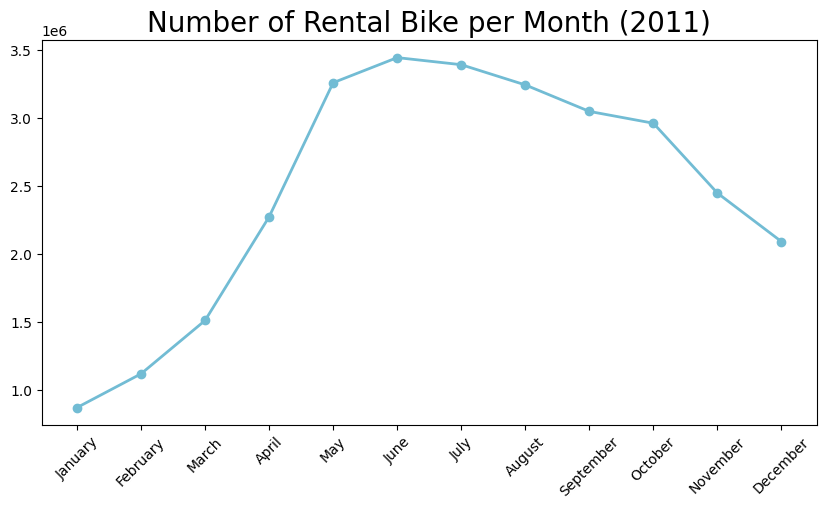

In [ ]:
filtered_data = day_hour_df[day_hour_df['dteday'].dt.year == 2011]
monthly_orders_df = filtered_data .resample(rule='M', on='dteday').agg({
    "cnt_x" : "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt_x" : "total_renting_bike"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["total_renting_bike"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Rental Bike per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.show()



*   Plt.plot() : membuat plot garis menggunakan data dari DataFrame monthly_orders_df. Pada sumbu x, data tanggal ("dteday") digunakan, sementara pada sumbu y, jumlah peminjaman sepeda ("total_renting_bike") digunakan. Parameter marker='o' digunakan untuk menampilkan titik-titik pada setiap titik data, linewidth=2 mengatur ketebalan garis plot, dan color="#72BCD4" menentukan warna garis plot.
*   Plt.title() :  menambahkan judul pada plot, yang menyatakan jumlah peminjaman sepeda per bulan selama tahun 2011. Parameter loc="center" mengatur posisi judul menjadi di tengah, dan fontsize=20 mengatur ukuran font judul.
*   plt.xticks(fontsize), plt.ytick(fontsize), plt.xticks(rotation): mengatur ukuran font untuk label sumbu x dan sumbu y menggunakan fontsize=10. plt.xticks(rotation=45) digunakan untuk memutar label sumbu x sebesar 45 derajat, sehingga lebih mudah dibaca jika ada banyak label yang tumpang tindih.
*   Plt.show() : menampilkan plot yang telah dibuat.





Hasil



*   Pada bulan-bulan awal (Januari hingga Maret), jumlah total sewa sepeda cenderung rendah. Kemudian, terjadi peningkatan signifikan pada bulan-bulan Mei hingga Juli, dengan bulan Juni memiliki jumlah sewa tertinggi. Setelah bulan Juli, terjadi penurunan tajam dalam jumlah sewa sepeda hingga akhir tahun.
*   penurunan yang signifikan dalam jumlah sewa sepeda terjadi pada bulan Oktober dan November



### Pertanyaan 2 dan Pertanyaan 3:

In [97]:
filtered_data = day_hour_df[day_hour_df['dteday'].dt.year == 2011]
rfm_df = filtered_data.groupby(by="instant_x", as_index=False).agg({
    "dteday": "max",      # Mengambil tanggal rental terakhir
    "cnt_x": "sum"          # Menghitung jumlah pesanan (monetary)
})

rfm_df.columns = ["instant", "max_order_timestamp", "frequency"]

# Hitung Recency (hari terakhir rental)
#last_date = filtered_data['dteday'].max()
#filtered_data['recency'] = (last_date - filtered_data['dteday']).dt.days

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = filtered_data["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,recency
0,1,23640,364
1,2,18423,363
2,3,29678,362
3,4,35926,361
4,5,36800,360


**Penjelasan Metode RFM :**
Metode RFM (Recency, Frequency, Monetary) Analysis adalah teknik analisis pelanggan yang digunakan oleh bisnis untuk memahami perilaku pembelian pelanggan berdasarkan tiga dimensi utama:

- Recency (Ketepatan waktu): Mengukur seberapa baru pelanggan telah
melakukan pembelian. Semakin baru pembelian dilakukan, semakin besar nilai recency-nya.

- Frequency (Frekuensi): Mengukur seberapa sering pelanggan melakukan pembelian. Semakin sering pembelian dilakukan, semakin tinggi nilai frekuensinya.

- Monetary (Moneter): Mengukur jumlah uang yang dihabiskan oleh pelanggan dalam periode waktu tertentu. Semakin banyak uang yang dihabiskan, semakin tinggi nilai moneternya.

**Penjelasan kode :**

*   filtered_data digunakan untuk menghasilkan DataFrame baru yang hanya berisi data peminjaman sepeda untuk tahun 2011.
*   Setelah data untuk tahun 2011 dipilih, data ini dikelompokkan berdasarkan kolom "instant_x". Kemudian, metode agg() digunakan untuk menghitung tanggal peminjaman terakhir ("dteday": "max") dan jumlah peminjaman ("cnt_x": "sum")
*   Nama kolom diubah menjadi lebih deskriptif, yaitu "instant" untuk indeks, "max_order_timestamp" untuk tanggal peminjaman terakhir, dan "monetary" untuk jumlah peminjaman.
*   Kolom "max_order_timestamp" diubah menjadi tipe data date untuk mempermudah perhitungan. Selanjutnya, kolom "recency" dihitung sebagai selisih antara tanggal peminjaman terakhir dengan tanggal terbaru dalam dataset, diukur dalam jumlah hari.
*   Kolom "max_order_timestamp" dihapus karena sudah tidak diperlukan lagi setelah perhitungan recency selesai.







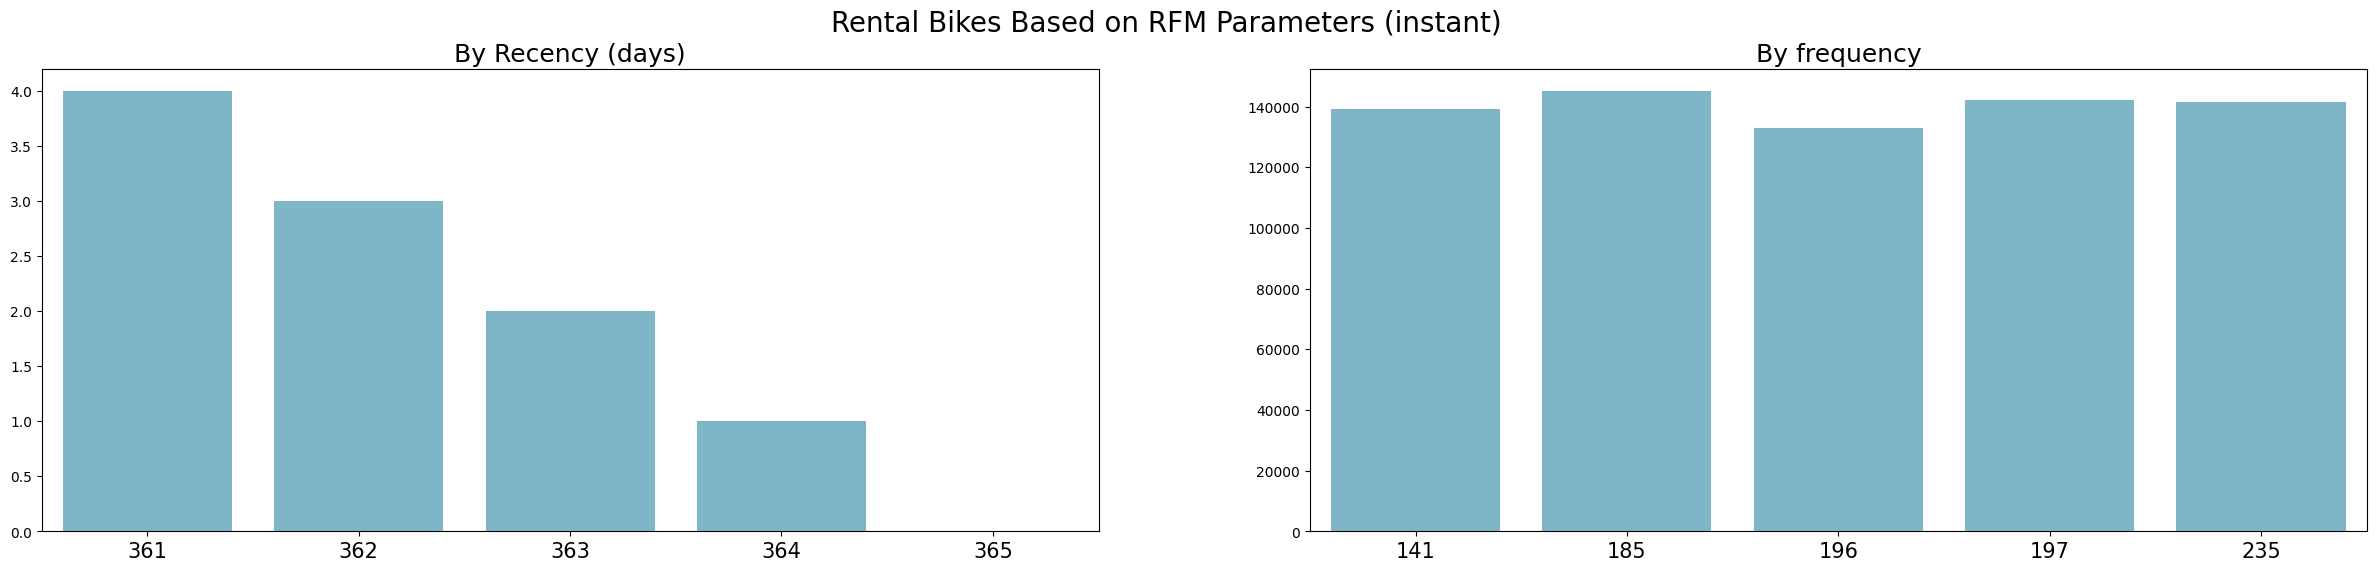

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplot dengan ukuran 30x6
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot untuk Recency
sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="instant", palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Plot untuk Monetary
sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="instant", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Menampilkan judul keseluruhan
plt.suptitle("Rental Bikes Based on RFM Parameters (instant)", fontsize=20)

# Menampilkan plot
plt.show()


**Penjelasan kode:**

*   Plot bar untuk menganalisis recency (seberapa baru pelanggan terakhir melakukan peminjaman). Data diurutkan berdasarkan recency dari yang terkecil, dan hanya lima data teratas yang diambil. Warna yang digunakan didefinisikan dalam list colors. Plot ini ditempatkan di subplot pertama (ax[0])
*   Plot bar untuk menganalisis monetary (total uang yang dihabiskan untuk peminjaman). Data diurutkan berdasarkan monetary dari yang terbesar, dan hanya lima data teratas yang diambil. Plot ini ditempatkan di subplot kedua (ax[1])



**Hasil Visualisasi :**

*   Nilai recency untuk data ini adalah 364, 363, 362, dan 361 hari. Ini menunjukkan berapa hari yang telah berlalu sejak pelanggan terakhir melakukan peminjaman sepeda pada masing-masing instant.
*   Nilai monetary untuk data ini adalah 23640, 18423, 29678, 35926, dan 36800. Ini mencerminkan total jumlah peminjaman sepeda yang dilakukan oleh pelanggan pada masing-masing instant.



### Pertanyaan 4:

<ipython-input-109-dfef74a48f84>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


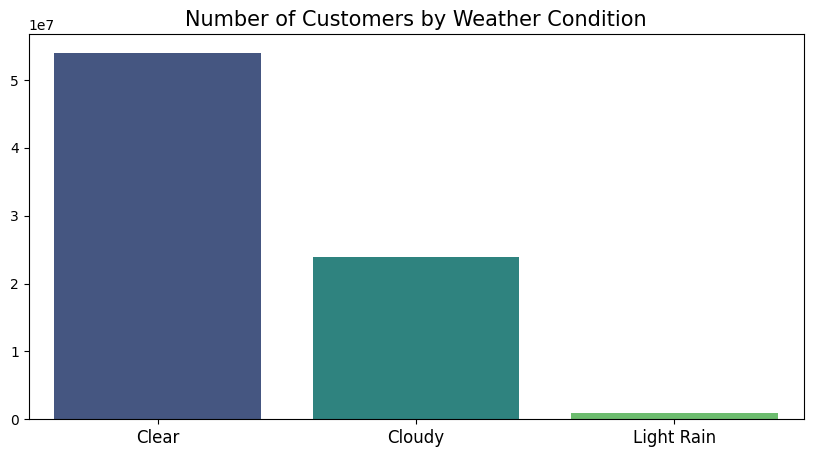

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grupkan data berdasarkan weathersit dan hitung jumlah total peminjaman sepeda
by_weathersit_df = day_hour_df.groupby(by="weathersit_x").cnt_x.sum().reset_index()
by_weathersit_df.rename(columns={"cnt_x": "total_bike_rental"}, inplace=True)  # Ubah "cnt" menjadi "cnt_x"

# Dictionary untuk memetakan angka weathersit ke label yang sesuai
weather_labels = {1: "Clear", 2: "Cloudy", 3: "Light Rain"}

# Menggunakan map() untuk mengganti nilai weathersit dengan label yang sesuai
by_weathersit_df['weathersit_label'] = by_weathersit_df['weathersit_x'].map(weather_labels)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(
    y="total_bike_rental",
    x="weathersit_label",
    data=by_weathersit_df.sort_values(by="total_bike_rental", ascending=False),
    palette="viridis"  # Ganti dengan palet warna yang diinginkan
)
plt.title("Number of Customers by Weather Condition", loc="center", fontsize=15)  # Ubah judul
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


**Penjelasan Kode :**

*   Melakukan pengelompokan data berdasarkan kondisi cuaca (weathersit) dan menghitung jumlah total peminjaman sepeda (cnt) untuk setiap kondisi cuaca. Hasilnya disimpan dalam DataFrame by_weathersit_df.
*   Mengubah nama kolom "cnt" menjadi "total_bike_rental" menggunakan metode rename()

*   Mendefinisikan sebuah dictionary weather_labels yang memetakan angka weathersit ke label yang sesuai, misalnya angka 1 menjadi "Clear", angka 2 menjadi "Cloudy", dan angka 3 menjadi "Light Rain". Dengan menggunakan metode map() untuk mengganti nilai weathersit dalam DataFrame dengan label yang sesuai, dan menyimpan hasilnya dalam kolom baru bernama weathersit_label
*   Setelah itu, saya membuat sebuah plot menggunakan sns.barplot(). SumBu Y (y-axis) adalah jumlah total peminjaman sepeda, sedangkan sumbu X (x-axis) adalah kondisi cuaca yang telah diubah menjadi label menggunakan kolom weathersit_label.




**Hasil Visualisasi:**

*   Clear merupakan kondisi cuaca dengan jumlah total peminjaman sepeda terbanyak yakni 2257952
*   Cloudy merupakan kondisi cuaca dengan jumlah total peminjaman sepeda terbanyak kedua setelah Clear yakni 996858
*   Light rain merupakan kondisi cuaca dengan jumlah total peminjaman sedikit yakni 37869
*   Cuaca Heavy Rain tidak memiliki peminjam sepeda sama sekali oleh karena itu tidak saya masukkan ke visualisasi



## Conclusion

- Conclution pertanyaan 1 : Performa peminjaman sepeda pada tahun 2011 meliputi peningkatan dan penurunan. Peningkatan terjadi dari bulan januari hinga juni. Bulan januari merupakan bulan dengan total peminjam sepeda yang paling sedikit yakni 870969. Puncak dari peningkatan ini terjadi pada bulan Juni dengan jumlah peminjam sepeda terbanyak yakni 3444288. Namun, dari bulan july sampai desember, cenderung mengalami penurunan
- Conclution pertanyaan 2 dan 3 : pelanggan pada instant dengan nilai recency yang lebih rendah cenderung lebih aktif dan melakukan peminjaman sepeda lebih sering. Sementara itu, instant dengan nilai monetary yang lebih tinggi menunjukkan bahwa di situ pelanggan melakukan lebih banyak peminjaman sepeda secara keseluruhan, yang dapat diinterpretasikan sebagai kontribusi lebih besar terhadap pendapatan perusahaan dari layanan peminjaman sepeda.
- Conclution pertanyaan 4 : Kondisi cuaca berperan penting terhadap jumlah peminjaman sepeda. Cuaca yang Clear akan mendapatkan jumlah peminjaman sepeda terbanyak. Namun cuaca yang tidak mendukung untuk kegiatan bersepeda seperti Heavy Rain tidak akan menarik minat customer. Untuk cuaca Cloudy dan Light Rain masih menarik minat customer namun pada cuaca Light Rain jumlah nya menurun drastis.

In [93]:
day_hour_df.to_csv("day_hour.csv", index=False)

In [94]:
from IPython.display import FileLink
FileLink(r'day_hour.csv')

/content/day_hour.csv